### Requirements

In [15]:
import pandas as pd
import glob
import os

parquet_path = './Datasets/Parquet Files'

In [ ]:
pip install contextily

In [ ]:
pip install geopandas

In [ ]:
pip install pyarrow


## Importieren der Roh- und Meta-Daten

In diesem Notebook wird das BASt Dataset verarbeitet und für Analysen vorbereitet.
- Meta_2024_*_A_S.csv und _B_S.csv werden zu `meta_df` und enthalten die Location kodiert als Koordinaten_UTM
- Roh_2024_*_A_S.csv und _B_S.csv werden zu `roh_df` und enthalten die Zielvariablen in Form von KFZ_R1 bis PLZ_R2

In [1]:
import pandas as pd
import glob
import os

# 1. Alle Meta- und Roh-Dateien finden (unabhängig von der Reihenfolge)
meta_files = sorted(glob.glob("./Datasets/BASt/Meta_2024_*_A_S.csv") + glob.glob("./Datasets/BASt/Meta_2024_*_B_S.csv"))
roh_files  = sorted(glob.glob("./Datasets/BASt/Roh_2024_*_A_S.csv")  + glob.glob("./Datasets/BASt/Roh_2024_*_B_S.csv"))

# 2. Meta-Dateien einlesen
meta_list = []
for file in meta_files:
    df = pd.read_csv(file, sep=";", encoding="latin1")  # <--- hier!
    df["quelle_datei"] = os.path.basename(file)
    meta_list.append(df)
meta_df = pd.concat(meta_list, ignore_index=True)

# 3. Roh-Dateien einlesen
roh_list = []
for file in roh_files:
    df = pd.read_csv(file, sep=";", encoding="latin1")
    df["quelle_datei"] = os.path.basename(file)
    roh_list.append(df)
roh_df = pd.concat(roh_list, ignore_index=True)

print("Meta-DF shape:", meta_df.shape)
print("Roh-DF shape:", roh_df.shape)

C:\Users\TOSA\AppData\Local\Temp\ipykernel_20036\1628684149.py:20: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep=";", encoding="latin1")
C:\Users\TOSA\AppData\Local\Temp\ipykernel_20036\1628684149.py:20: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep=";", encoding="latin1")
C:\Users\TOSA\AppData\Local\Temp\ipykernel_20036\1628684149.py:20: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep=";", encoding="latin1")
C:\Users\TOSA\AppData\Local\Temp\ipykernel_20036\1628684149.py:20: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep=";", encoding="latin1")
C:\Users\TOSA\AppData\Local\Temp\ipykernel_20036\1628684149.py:20: DtypeWarning: Columns (4) have mixed types. Specify d

Meta-DF shape: (25327, 14)
Roh-DF shape: (18193307, 58)


In [2]:
meta_df.head()

,Dauerzaehlstellennummer,Dauerzaehlstellenname,Landesnummer,Landeskuerzel,Straßenklasse,Straßennummer,Straßennumernzusatz,Nahziel_Richtung_1,Himmelsrichtung_Richtung_1,Nahziel_Richtung_2,Himmelsrichtung_Richtung_2,Koordinaten_UTM32_E,Koordinaten_UTM32_N,quelle_datei
0,1101,Bad Oldesloe,1,SH,A,1,NaN,AS Reinfeld,N,AS Bad Oldesloe,S,"594121,056","5961309,270",Meta_2024_01_A_S.csv
1,1102,Barsbüttel,1,SH,A,1,NaN,AS Barsbüttel,N,AK Kreuz Hamburg-Ost (A24),S,"578184,972","5935581,358",Meta_2024_01_A_S.csv
2,1104,Rumohr,1,SH,A,215,NaN,AK Kreuz Kiel-West (A210),N,AS Blumenthal,S,"566924,124","6011849,671",Meta_2024_01_A_S.csv
3,1105,Neustadt i. H.-Süd,1,SH,A,1,NaN,AS Neustadt i.H.-Pelzerhaken,N,AS Neustadt i.H.-Mitte,S,"616449,017","5996536,140",Meta_2024_01_A_S.csv
4,1106,Einfeld,1,SH,A,7,NaN,AD Dreieck Bordesholm (A215),N,AS Neumünster-Nord,S,"562466,500","5998018,883",Meta_2024_01_A_S.csv


In [3]:
roh_df.head(100)

,TKNR,Zst,Land,Strklas,Strnum,Datum,Wotag,Fahrtzw,Stunde,KFZ_R1,...,K_Bus_R2,LoA_R2,K_LoA_R2,Lzg_R2,K_Lzg_R2,Sat_R2,K_Sat_R2,Son_R2,K_Son_R2,quelle_datei
0,2228,1101,1,A,1,240101,1,,1,0,...,a,0,a,0,a,0,a,0,a,Roh_2024_01_A_S.csv
1,2228,1101,1,A,1,240101,1,,2,0,...,a,0,a,0,a,0,a,0,a,Roh_2024_01_A_S.csv
2,2228,1101,1,A,1,240101,1,,3,0,...,a,0,a,0,a,0,a,0,a,Roh_2024_01_A_S.csv
3,2228,1101,1,A,1,240101,1,,4,0,...,a,0,a,0,a,0,a,0,a,Roh_2024_01_A_S.csv
4,2228,1101,1,A,1,240101,1,,5,0,...,a,0,a,0,a,0,a,0,a,Roh_2024_01_A_S.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2228,1101,1,A,1,240104,4,,24,0,...,a,0,a,0,a,0,a,0,a,Roh_2024_01_A_S.csv
96,2228,1101,1,A,1,240105,5,,1,0,...,a,0,a,0,a,0,a,0,a,Roh_2024_01_A_S.csv
97,2228,1101,1,A,1,240105,5,,2,0,...,a,0,a,0,a,0,a,0,a,Roh_2024_01_A_S.csv
98,2228,1101,1,A,1,240105,5,,3,0,...,a,0,a,0,a,0,a,0,a,Roh_2024_01_A_S.csv


In [11]:
roh_df = roh_df.astype(str)
roh_df.to_parquet("roh_df.parquet", index=False)


##### Exploration non_zero usw

In [16]:
# Erst sicherstellen, dass die Spalten numerisch sind:
roh_df["KFZ_R1"] = pd.to_numeric(roh_df["KFZ_R1"], errors="coerce")
roh_df["KFZ_R2"] = pd.to_numeric(roh_df["KFZ_R2"], errors="coerce")

# Jetzt filtern:
roh_nonzero = roh_df[(roh_df["KFZ_R1"] > 0) | (roh_df["KFZ_R2"] > 0)]

print(roh_nonzero.shape)


(15948462, 58)


In [17]:
roh_nonzero.head()

,TKNR,Zst,Land,Strklas,Strnum,Datum,Wotag,Fahrtzw,Stunde,KFZ_R1,...,K_Bus_R2,LoA_R2,K_LoA_R2,Lzg_R2,K_Lzg_R2,Sat_R2,K_Sat_R2,Son_R2,K_Son_R2,quelle_datei
744,2427,1102,1,A,1,240101,1,,1,258,...,-,0,-,3,-,3,-,2,-,Roh_2024_01_A_S.csv
745,2427,1102,1,A,1,240101,1,,2,684,...,-,0,-,6,-,5,-,12,-,Roh_2024_01_A_S.csv
746,2427,1102,1,A,1,240101,1,,3,554,...,-,1,-,4,-,4,-,6,-,Roh_2024_01_A_S.csv
747,2427,1102,1,A,1,240101,1,,4,348,...,-,2,-,10,-,9,-,3,-,Roh_2024_01_A_S.csv
748,2427,1102,1,A,1,240101,1,,5,189,...,-,0,-,10,-,10,-,3,-,Roh_2024_01_A_S.csv


#### Dataframes reduzieren

Aus dem `roh_df` werden nur die relevanten der ursprünglich 55 Spalten behalten.

In [18]:
roh_df = pd.read_parquet("roh_df.parquet")

In [20]:
# Mapping: Original → Übersetzung
col_map = {
    "TKNR":     "TKNR",
    "Zst":      "Zählstellennummer",
    "Land":     "Bundesland",
    "Strklas":  "Straßenklasse",
    "Strnum":   "Straßennummer",
    "Datum":    "Datum",
    "Wotag":    "Wochentag",
    "Fahrtzw":  "Fahrtrichtung",
    "Stunde":   "Stunde",
    "KFZ_R1":   "Verkehrsmenge alle Kfz Richtung 1",
    "KFZ_R2":   "Verkehrsmenge alle Kfz Richtung 2",
    "Lkw_R1":   "Verkehrsmenge Lkw-Gruppe Richtung 1",
    "Lkw_R2":   "Verkehrsmenge Lkw-Gruppe Richtung 2",
    "PLZ_R1":   "Verkehrsmenge Pkw-Gruppe (Pkw, Lfw, Mot) Richtung 1",
    "PLZ_R2":   "Verkehrsmenge Pkw-Gruppe (Pkw, Lfw, Mot) Richtung 2"
}

# Liste der Original-Spalten
gew_spalten = list(col_map.keys())

# Nur gewünschte Spalten übernehmen (ohne Filter auf > 0)
roh_selected = roh_df[gew_spalten].copy()

# Spaltennamen übersetzen
roh_selected.rename(columns=col_map, inplace=True)

# Kontrolle
print(roh_selected.head())
print(roh_selected.shape)

# Optional: Abspeichern
roh_selected.to_parquet("roh_selected_deutsch.parquet", index=False)
roh_selected.to_csv("roh_selected_deutsch.csv", sep=";", index=False)


   TKNR Zählstellennummer Bundesland Straßenklasse Straßennummer   Datum  \
0  2228              1101          1             A             1  240101   
1  2228              1101          1             A             1  240101   
2  2228              1101          1             A             1  240101   
3  2228              1101          1             A             1  240101   
4  2228              1101          1             A             1  240101   

  Wochentag Fahrtrichtung Stunde Verkehrsmenge alle Kfz Richtung 1  \
0         1                    1                                 0   
1         1                    2                                 0   
2         1                    3                                 0   
3         1                    4                                 0   
4         1                    5                                 0   

  Verkehrsmenge alle Kfz Richtung 2 Verkehrsmenge Lkw-Gruppe Richtung 1  \
0                                 0            

## Koordinaten_UTM Zuordnung

### Einlesen und Umwandlung von Koordinaten in POINT (594121.056 5961309.27)

In [ ]:
meta_df.to_parquet("meta_df.parquet", index=False)

In [6]:
import pandas as pd
meta_df = pd.read_parquet("meta_df.parquet")
meta_df.head()

,Dauerzaehlstellennummer,Dauerzaehlstellenname,Landesnummer,Landeskuerzel,Straßenklasse,Straßennummer,Straßennumernzusatz,Nahziel_Richtung_1,Himmelsrichtung_Richtung_1,Nahziel_Richtung_2,Himmelsrichtung_Richtung_2,Koordinaten_UTM32_E,Koordinaten_UTM32_N,quelle_datei
0,1101,Bad Oldesloe,1,SH,A,1,None,AS Reinfeld,N,AS Bad Oldesloe,S,"594121,056","5961309,270",Meta_2024_01_A_S.csv
1,1102,Barsbüttel,1,SH,A,1,None,AS Barsbüttel,N,AK Kreuz Hamburg-Ost (A24),S,"578184,972","5935581,358",Meta_2024_01_A_S.csv
2,1104,Rumohr,1,SH,A,215,None,AK Kreuz Kiel-West (A210),N,AS Blumenthal,S,"566924,124","6011849,671",Meta_2024_01_A_S.csv
3,1105,Neustadt i. H.-Süd,1,SH,A,1,None,AS Neustadt i.H.-Pelzerhaken,N,AS Neustadt i.H.-Mitte,S,"616449,017","5996536,140",Meta_2024_01_A_S.csv
4,1106,Einfeld,1,SH,A,7,None,AD Dreieck Bordesholm (A215),N,AS Neumünster-Nord,S,"562466,500","5998018,883",Meta_2024_01_A_S.csv


In [7]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# 1.1 Metadaten laden
meta_df = pd.read_parquet("meta_df.parquet")

# Die Koordinaten als String einlesen und das Komma durch Punkt ersetzen,
# dann als float casten:
meta_df["Koordinaten_UTM32_E"] = meta_df["Koordinaten_UTM32_E"].astype(str).str.replace(",", ".").astype(float)
meta_df["Koordinaten_UTM32_N"] = meta_df["Koordinaten_UTM32_N"].astype(str).str.replace(",", ".").astype(float)

In [101]:
from shapely.geometry import Point
import geopandas as gpd

meta_df["geometry"] = meta_df.apply(
    lambda row: Point(row["Koordinaten_UTM32_E"], row["Koordinaten_UTM32_N"]), axis=1
)

meta_gdf = gpd.GeoDataFrame(meta_df, geometry="geometry", crs="EPSG:25832")

# Voraussetzung: meta_gdf enthält eine Geometry-Spalte und gültiges CRS
meta_gdf.to_parquet("meta_gdf.parquet", index=False)


In [9]:
import geopandas as gpd
meta_gdf = gpd.read_parquet("meta_gdf.parquet")
print(meta_gdf.crs)          # prüft das CRS (z. B. EPSG:25832)
print(meta_gdf.geometry.head())


{"$schema": "https://proj.org/schemas/v0.7/projjson.schema.json", "type": "ProjectedCRS", "name": "ETRS89 / UTM zone 32N", "base_crs": {"name": "ETRS89", "datum_ensemble": {"name": "European Terrestrial Reference System 1989 ensemble", "members": [{"name": "European Terrestrial Reference Frame 1989"}, {"name": "European Terrestrial Reference Frame 1990"}, {"name": "European Terrestrial Reference Frame 1991"}, {"name": "European Terrestrial Reference Frame 1992"}, {"name": "European Terrestrial Reference Frame 1993"}, {"name": "European Terrestrial Reference Frame 1994"}, {"name": "European Terrestrial Reference Frame 1996"}, {"name": "European Terrestrial Reference Frame 1997"}, {"name": "European Terrestrial Reference Frame 2000"}, {"name": "European Terrestrial Reference Frame 2005"}, {"name": "European Terrestrial Reference Frame 2014"}, {"name": "European Terrestrial Reference Frame 2020"}], "ellipsoid": {"name": "GRS 1980", "semi_major_axis": 6378137, "inverse_flattening": 298.257

In [10]:
# Optional: Kontrolle
print(meta_gdf[["Dauerzaehlstellennummer", "geometry"]].head(15))

    Dauerzaehlstellennummer                        geometry
0                      1101   POINT (594121.056 5961309.27)
1                      1102  POINT (578184.972 5935581.358)
2                      1104  POINT (566924.124 6011849.671)
3                      1105   POINT (616449.017 5996536.14)
4                      1106    POINT (562466.5 5998018.883)
5                      1107  POINT (541658.159 6028166.846)
6                      1108   POINT (609762.07 5972762.429)
7                      1109  POINT (522137.411 6069898.776)
8                      1110        POINT (615433.5 5933199)
9                      1119  POINT (558301.454 5942310.101)
10                     1124   POINT (622474.23 6018516.918)
11                     1140  POINT (585568.268 5924291.408)
12                     1154  POINT (534150.251 5971824.376)
13                     1156  POINT (579303.143 5995614.943)
14                     1162  POINT (567008.394 6018106.835)


## Anzeige auf Deutschlandkarte

### Verwaltungsgebiete Matching

In [39]:
import geopandas as gpd

# Entpacke ZIP, finde 'VG250_GEM.shp' oder im GeoPackage 'VG250_GEM'
gemeinden = gpd.read_file("./Datasets/Verwaltungsgebiete/VG250_GEM.shp").to_crs("EPSG:4326")

# Optional: nur deine Städte per AGS oder Namen filtern
ags_liste = ["05334000", "05913000", ...]  # AGS als Strings
namen     = ["Aachen", "Gelsenkirchen", ...]
target = gemeinden[ gemeinden["AGS"].isin(ags_liste) | gemeinden["GEN"].isin(namen) ]

# Spatial Join mit deinen Zählstellen
city_zs = gpd.sjoin(meta_gdf, target[["AGS","GEN","geometry"]], how="inner", predicate="within")


C:\Users\TOSA\AppData\Local\Temp\ipykernel_20036\4222635451.py:12: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:25832
Right CRS: EPSG:4326

  city_zs = gpd.sjoin(meta_gdf, target[["AGS","GEN","geometry"]], how="inner", predicate="within")


In [40]:
# 1) Meta-GDF nach WGS84 transformieren
meta_gdf = meta_gdf.to_crs("EPSG:4326")

# 2) Gemeindegrenzen (target) ebenfalls sicher in WGS84
target = target.to_crs("EPSG:4326")

# 3) Spatial Join durchführen
city_zs = gpd.sjoin(
    meta_gdf,
    target[["AGS", "GEN", "geometry"]],
    how="inner",
    predicate="within"
)

print(city_zs[["Dauerzaehlstellennummer", "GEN"]].head())
print("Anzahl Zählstellen:", city_zs.shape[0])


     Dauerzaehlstellennummer     GEN
133                     5008  Aachen
143                     5020  Aachen
192                     5072  Aachen
194                     5074  Aachen
197                     5077  Aachen
Anzahl Zählstellen: 264


### Lesen und vorbereiten der VG250_GEM.shp

Auslesen VG250

In [43]:
import geopandas as gpd

# Einlesen (Pfad ggf. anpassen)
VG250_GEM_df = gpd.read_file("./Datasets/Verwaltungsgebiete/VG250_GEM.shp")

# Optional: Umprojizieren nach WGS84 für Webanwendungen
VG250_GEM_df = VG250_GEM_df.to_crs("EPSG:4326")

# Als GeoParquet (schnell, platzsparend, Geo-Spalten bleiben erhalten)
VG250_GEM_df.to_parquet("VG250_GEM_df.parquet", index=False)

# Oder klassisch als Pickle (Pandas/GeoPandas-Objekt, inkl. aller Typen/Geometrien)
VG250_GEM_df.to_pickle("VG250_GEM_df.pkl")

# Oder als CSV (ohne Geometrie) – meist nicht sinnvoll bei Geo-Daten
VG250_GEM_df.drop(columns="geometry").to_csv("VG250_GEM_df.csv", index=False)


In [46]:
print("Anzahl Zeilen (Gemeinden):", VG250_GEM_df.shape[0])
print("Anzahl Spalten:", VG250_GEM_df.shape[1])
print("\nSpaltennamen:")
print(VG250_GEM_df.columns.tolist())

Anzahl Zeilen (Gemeinden): 11111
Anzahl Spalten: 26

Spaltennamen:
['OBJID', 'BEGINN', 'ADE', 'GF', 'BSG', 'ARS', 'AGS', 'SDV_ARS', 'GEN', 'BEZ', 'IBZ', 'BEM', 'NBD', 'SN_L', 'SN_R', 'SN_K', 'SN_V1', 'SN_V2', 'SN_G', 'FK_S3', 'NUTS', 'ARS_0', 'AGS_0', 'WSK', 'DLM_ID', 'geometry']


In [50]:
gew_spalten = ['ARS', 'AGS', 'SDV_ARS', 'GEN', 'BEZ', 'BEM', 'geometry']
gemeinden_selected = VG250_GEM_df[gew_spalten].copy()

print(gemeinden_selected.head())
print("Shape:", gemeinden_selected.shape)
gemeinden_selected.to_parquet('gemeinden_selected.parquet')


            ARS       AGS       SDV_ARS          GEN    BEZ        BEM  \
0  010010000000  01001000  010010000000    Flensburg  Stadt  kreisfrei   
1  010020000000  01002000  010020000000         Kiel  Stadt  kreisfrei   
2  010030000000  01003000  010030000000       Lübeck  Stadt  kreisfrei   
3  010040000000  01004000  010040000000   Neumünster  Stadt  kreisfrei   
4  010510011011  01051011  010510011011  Brunsbüttel  Stadt         --   

                                            geometry  
0  POLYGON ((9.41266 54.82264, 9.41318 54.82124, ...  
1  POLYGON ((10.16916 54.43138, 10.16957 54.43067...  
2  POLYGON ((10.87684 53.98737, 10.87884 53.98595...  
3  POLYGON ((9.99545 54.14972, 9.99713 54.14806, ...  
4  POLYGON ((9.16439 53.94509, 9.16706 53.94302, ...  
Shape: (11111, 7)


### Gemeinden auf Top 30 Städte filtern

#### gemeinden_selected einlesen und deduplizieren

In [ ]:
gemeinden_selected = pd.read_parquet('gemeinden_selected.parquet')

In [54]:
import pandas as pd

gemeinden_selected = pd.read_parquet('gemeinden_selected.parquet')

# 1. Stadt-Liste laden (ohne Header)
top30 = pd.read_csv("./Datasets/Support Datasets/top30_staedte.csv", header=None, names=["GEN"])

# 2. Gemeinden auf GEN-Liste und BEZ='Stadt' filtern
stadtliste = top30["GEN"].tolist()
gemeinden_top30 = gemeinden_selected[
    (gemeinden_selected["GEN"].isin(stadtliste)) & 
    (gemeinden_selected["BEZ"] == "Stadt")
].copy()

print(gemeinden_top30.head())
print("Anzahl Städte gefunden:", gemeinden_top30.shape[0])


               ARS       AGS       SDV_ARS           GEN    BEZ        BEM  \
1     010020000000  01002000  010020000000          Kiel  Stadt  kreisfrei   
1106  020000000000  02000000  020000000000       Hamburg  Stadt  kreisfrei   
1107  031010000000  03101000  031010000000  Braunschweig  Stadt  kreisfrei   
1282  032410001001  03241001  032410001001      Hannover  Stadt         --   
2071  040110000000  04011000  040110000000        Bremen  Stadt  kreisfrei   

                                               geometry  
1     b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xce\x02...  
1106  b'\x01\x06\x00\x00\x00\x05\x00\x00\x00\x01\x03...  
1107  b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xbc\x01...  
1282  b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x7f\x02...  
2071  b'\x01\x06\x00\x00\x00\x03\x00\x00\x00\x01\x03...  
Anzahl Städte gefunden: 33


In [53]:
gemeinden_top30.head(50)

,ARS,AGS,SDV_ARS,GEN,BEZ,BEM,geometry
1,010020000000,01002000,010020000000,Kiel,Stadt,kreisfrei,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xce\x02...
1106,020000000000,02000000,020000000000,Hamburg,Stadt,kreisfrei,b'\x01\x06\x00\x00\x00\x05\x00\x00\x00\x01\x03...
1107,031010000000,03101000,031010000000,Braunschweig,Stadt,kreisfrei,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xbc\x01...
1282,032410001001,03241001,032410001001,Hannover,Stadt,--,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x7f\x02...
2071,040110000000,04011000,040110000000,Bremen,Stadt,kreisfrei,b'\x01\x06\x00\x00\x00\x03\x00\x00\x00\x01\x03...
2073,051110000000,05111000,051110000000,Düsseldorf,Stadt,kreisfrei,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x1b\x02...
2074,051120000000,05112000,051120000000,Duisburg,Stadt,kreisfrei,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xb0\x01...
2075,051130000000,05113000,051130000000,Essen,Stadt,kreisfrei,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xa7\x01...
2077,051160000000,05116000,051160000000,Mönchengladbach,Stadt,kreisfrei,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xa5\x01...
2082,051240000000,05124000,051240000000,Wuppertal,Stadt,kreisfrei,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00h\x02\x0...


Kiel, Hamburg und Bremen kommen doppelt vor und müssen nun noch dedupliziert werden.

In [ ]:
import geopandas as gpd

# 1) Filterung direkt aus dem GeoDataFrame (nicht Phantom-Df mit Bytes)
gemeinden_top30 = VG250_GEM_df[
    (VG250_GEM_df["GEN"].isin(stadtliste)) &
    (VG250_GEM_df["BEZ"] == "Stadt")
].copy()

# Stelle sicher, dass das ein GeoDataFrame ist
print(type(gemeinden_top30))  # sollte <class 'geopandas.geodataframe.GeoDataFrame'> sein

gemeinden_top30 = gpd.GeoDataFrame(
    gemeinden_top30,
    geometry="geometry",
    crs="EPSG:4326"
)


<class 'geopandas.geodataframe.GeoDataFrame'>


In [68]:
gemeinden_top30_geo = gemeinden_top30.dissolve(by="GEN", as_index=False)

print(gemeinden_top30_geo[["GEN", "geometry"]])
print("Anzahl eindeutiger Städte:", gemeinden_top30_geo.shape[0])
print("Geometrietypen:", gemeinden_top30_geo.geometry.geom_type.value_counts())

gemeinden_top30_geo.to_parquet('gemeinden_top30_geo.parquet')

                  GEN                                           geometry
0              Aachen  POLYGON ((6.05683 50.85296, 6.05708 50.8521, 6...
1            Augsburg  POLYGON ((10.89326 48.45844, 10.89325 48.45813...
2              Berlin  POLYGON ((13.48006 52.67465, 13.47879 52.67345...
3           Bielefeld  POLYGON ((8.50936 52.11483, 8.51095 52.11349, ...
4              Bochum  POLYGON ((7.295 51.53105, 7.29568 51.52999, 7....
5                Bonn  POLYGON ((7.13221 50.77185, 7.13461 50.7706, 7...
6        Braunschweig  POLYGON ((10.52236 52.35681, 10.52483 52.35279...
7              Bremen  MULTIPOLYGON (((8.51264 53.22756, 8.51527 53.2...
8            Chemnitz  POLYGON ((12.89077 50.90252, 12.89133 50.90239...
9            Dortmund  POLYGON ((7.42328 51.59011, 7.42053 51.58669, ...
10            Dresden  POLYGON ((13.75597 51.17685, 13.75924 51.17423...
11           Duisburg  POLYGON ((6.703 51.55403, 6.70729 51.55077, 6....
12         Düsseldorf  POLYGON ((6.75294 51.34988, 

### Top 30 Städte auf der Deutschlandkarte

Zählstellen innerhalb Top‑30 Städte: 213


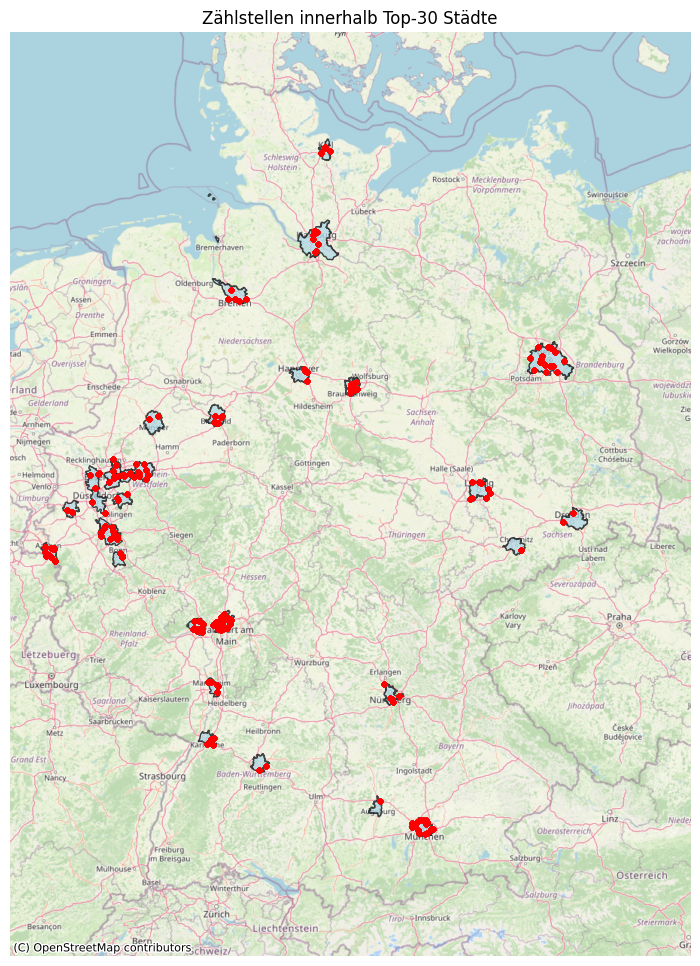

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx

gemeinden_top30_geo = gpd.read_parquet(f"{parquet_path}/gemeinden_top30_geo.parquet")
meta_gdf = gpd.read_parquet(f"{parquet_path}/meta_gdf.parquet")

# 1) Deutschland-Karte im Web-Mercator
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
germany = world[world["ADMIN"] == "Germany"].to_crs(epsg=3857)

# 2): Achte darauf, dass beide DataFrames im gleichen CRS sind:
gemeinden = gemeinden_top30_geo.to_crs(epsg=3857)
meta_points = meta_gdf.to_crs(epsg=3857)

# Spatial Join: nur Zählstellen innerhalb der Gemeinden
points_in_stadt = gpd.sjoin(
    meta_points,
    gemeinden[["GEN", "geometry"]],
    how="inner",
    predicate="within"
)

points_in_stadt_unique = points_in_stadt.drop_duplicates(subset=['GEN', 'Dauerzaehlstellennummer'])
print("Zählstellen innerhalb Top‑30 Städte:", points_in_stadt_unique.shape[0])

# Visualisierung mit finalem Filter:
fig, ax = plt.subplots(figsize=(12,12))
germany.plot(ax=ax, color="white", edgecolor="gray", alpha=0.0, zorder=1)
gemeinden.plot(ax=ax, facecolor="lightblue", edgecolor="black",
               alpha=0.7, linewidth=1, zorder=2)
points_in_stadt.plot(ax=ax, color="red", markersize=10,
                     alpha=0.8, zorder=3)

cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)
ax.set_title("Zählstellen innerhalb Top‑30 Städte")
ax.set_axis_off()
plt.show()


In [19]:
# Zähle die Punkte pro Stadt
zaehlstellen_counts = points_in_stadt_unique["GEN"].value_counts().rename_axis("Stadt").reset_index(name="Anzahl_Zählerstellen")

zaehlstellen_counts.head(33)


,Stadt,Anzahl_Zählerstellen
0,Frankfurt am Main,35
1,München,18
2,Berlin,17
3,Köln,13
4,Wiesbaden,12
5,Aachen,12
6,Braunschweig,9
7,Dortmund,8
8,Leipzig,8
9,Hamburg,8


### Top 30 Städte - Join mit meta_df Dauerzählstellen

In [ ]:
import geopandas as gpd

gemeinden_top30_geo = gpd.read_parquet(f"{parquet_path}/gemeinden_top30_geo.parquet")
meta_gdf = gpd.read_parquet(f"{parquet_path}/meta_gdf.parquet")

# Voraussetzung: beide GeoDataFrames im gleichen CRS
meta_points = meta_gdf.to_crs(epsg=3857)
gemeinden = gemeinden_top30_geo.to_crs(epsg=3857)

# Spatial join mit Filter "inner" → beinhaltet nur Zählstellen in den Städten
zaehlstellen_in_staedten = gpd.sjoin(
    meta_points,
    gemeinden[["GEN", "geometry"]],
    how="inner",
    predicate="within"
)

# Optional: Ursprungs-Geometriedelete/Index löschen
zaehlstellen_in_staedten = zaehlstellen_in_staedten.drop(columns=["index_right"])


In [ ]:
zaehlstellen_in_staedten.to_parquet(f"{parquet_path}/zaehlstellen_top30.parquet", index=False)


In [112]:
import pandas as pd

# Gesamtanzahl aller Zählstellen
gesamtzahl = len(zaehlstellen_in_staedten)
print(f"Gesamtzahl der Zählstellen in Top‑30‑Städten: {gesamtzahl}")

# Anzahl Zählstellen pro Stadt (GEN)
counts_per_stadt = (
    zaehlstellen_in_staedten["GEN"]
    .value_counts()
    .rename_axis("Stadt")
    .reset_index(name="Anzahl_Zählstellen")
)

print("\nAnzahl Zählstellen pro Stadt:")
print(counts_per_stadt)


Gesamtzahl der Zählstellen in Top‑30‑Städten: 2556

Anzahl Zählstellen pro Stadt:
                Stadt  Anzahl_Zählstellen
0   Frankfurt am Main                 420
1             München                 216
2              Berlin                 204
3                Köln                 156
4           Wiesbaden                 144
5              Aachen                 144
6        Braunschweig                 108
7            Dortmund                  96
8             Hamburg                  96
9             Leipzig                  96
10               Bonn                  72
11             Bochum                  72
12          Bielefeld                  72
13              Essen                  72
14           Mannheim                  60
15             Bremen                  60
16          Karlsruhe                  60
17           Nürnberg                  60
18           Duisburg                  48
19           Hannover                  48
20               Kiel               